# Importing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
# Importing the dataset

leads_data = pd.read_csv('Leads.csv')
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Inspecting the dataset

leads_data.shape

(9240, 37)

In [4]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data Preparation

In [6]:
# Replacing "select" values in the data set with np.nan

leads_data = leads_data.replace(to_replace="Select", value=np.nan)
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Null value treatment

In [7]:
leads_data.isnull().sum()
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Dropping the columns with null value percentage of more than 50. In addition to these columns, 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Tags' are the columns that were populated by the sales team and they do not come directly with the leads data. And so, we need to remove these columns as well.


####  


In [8]:
drop_these = ['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 
              'Asymmetrique Profile Score', 'Lead Profile', 'Tags', 'How did you hear about X Education',
              'Lead Quality']

leads_data = leads_data.drop(drop_these, axis=1)
leads_data.shape

(9240, 29)

In [9]:
# dropping highly skewed columns

highly_skewed = ['Do Not Call', 'Country', 
                 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article',
                 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
                 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content',
                 'I agree to pay the amount through cheque']

leads_data = leads_data.drop(highly_skewed, axis=1)


In [10]:
# dropping the rows with more than 5 null values

leads_data = leads_data[leads_data.isnull().sum(axis=1)<5]
leads_data.shape

(9197, 15)

In [11]:
# Replacing the missing values of all other columns with their respective mode

leads_data['Do Not Email'].fillna(leads_data['Do Not Email'].mode()[0], inplace=True)
leads_data['What is your current occupation'].fillna(leads_data['What is your current occupation'].mode()[0], inplace=True)
leads_data['Lead Source'].fillna(leads_data['Lead Source'].mode()[0], inplace=True)
leads_data['TotalVisits'].fillna(leads_data['TotalVisits'].mode()[0], inplace=True)
leads_data['Page Views Per Visit'].fillna(leads_data['Page Views Per Visit'].mode()[0], inplace=True)
leads_data['Last Activity'].fillna(leads_data['Last Activity'].mode()[0], inplace=True)
leads_data['Specialization'].fillna(leads_data['Specialization'].mode()[0], inplace=True)
leads_data['City'].fillna(leads_data['City'].mode()[0], inplace=True)



In [12]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

# Combining categories column wise

#### Checking the distribution of data of each column. If there are too many levels with very less percent share of data, they will be combined.

In [13]:
leads_data['Lead Origin'].value_counts(normalize=True)

# Combining categories
leads_data['Lead Origin'].replace(to_replace=['Lead Add Form', 'Lead Import', 'Quick Add Form'], value='LO3', inplace=True)
leads_data['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.531260
API                        0.389149
LO3                        0.079591
Name: Lead Origin, dtype: float64

In [14]:
leads_data['Lead Source'].value_counts(normalize=True)

# Combining categories

leads_data['Lead Source'].replace(to_replace=['Reference', 'Welingak Website','Referral Sites', 'Facebook',
                                              'bing', 'google', 'Click2call', 'Live Chat', 'Social Media', 'Press_Release',
                                              'WeLearn', 'blog', 'testone', 'NC_EDM','youtubechannel','welearnblog_Home', 
                                              'Pay per Click Ads'], value= 'LS4', inplace=True)
leads_data['Lead Source'].value_counts(normalize=True)

Google            0.315103
Direct Traffic    0.276503
Olark Chat        0.190714
Organic Search    0.125476
LS4               0.092204
Name: Lead Source, dtype: float64

In [15]:
leads_data['Last Activity'].replace(to_replace=['Page Visited on Website','Converted to Lead','Email Bounced',
                                                'Email Link Clicked','Form Submitted on Website','Unreachable','Unsubscribed',
                                                'Had a Phone Conversation','Approached upfront','View in browser link Clicked',
                                                'Email Marked Spam','Email Received','Resubscribed to emails',
                                                'Visited Booth in Tradeshow','Olark Chat Conversation'], value='LA3', 
                                    inplace=True)
leads_data['Last Activity'].value_counts(normalize=True)

Email Opened    0.380776
LA3             0.320757
SMS Sent        0.298467
Name: Last Activity, dtype: float64

In [16]:
leads_data['Specialization'].value_counts(normalize=True)
leads_data['Specialization'].replace(to_replace=['Human Resource Management', 'Marketing Management', 'Operations Management',
                                                 'Business Administration', 'IT Projects Management', 'Supply Chain Management',
                                                 'Banking, Investment And Insurance', 'Media and Advertising', 
                                                 'Travel and Tourism', 'International Business', 'Healthcare Management',
                                                 'Hospitality Management', 'E-COMMERCE', 'Retail Management', 
                                                 'Rural and Agribusiness', 'E-Business', 'Services Excellence'], value= 'S2',
                                    inplace=True)
leads_data['Specialization'].value_counts(normalize=True)

S2                    0.531043
Finance Management    0.468957
Name: Specialization, dtype: float64

In [17]:
leads_data['City'].value_counts(normalize=True)

leads_data['City'].replace(to_replace=['Thane & Outskirts', 'Other Cities', 'Other Cities of Maharashtra', 
                                       'Other Metro Cities', 'Tier II Cities'], value='C2', inplace=True)
leads_data['City'].value_counts(normalize=True)

Mumbai    0.744591
C2        0.255409
Name: City, dtype: float64

In [18]:
leads_data['Last Notable Activity'].value_counts(normalize=True).index

leads_data['Last Notable Activity'].replace(to_replace=['Page Visited on Website', 'Olark Chat Conversation', 
                                                        'Email Link Clicked', 'Email Bounced', 'Unsubscribed', 'Unreachable',
                                                        'Had a Phone Conversation', 'Email Marked Spam', 'Approached upfront', 
                                                        'View in browser link Clicked', 'Resubscribed to emails', 
                                                        'Form Submitted on Website', 'Email Received'], value='LNA4', 
                                            inplace=True)
leads_data['Last Notable Activity'].value_counts(normalize=True)

Modified        0.365771
Email Opened    0.307383
SMS Sent        0.236164
LNA4            0.090682
Name: Last Notable Activity, dtype: float64

In [19]:
leads_data['What is your current occupation'].value_counts(normalize=True).index

leads_data['What is your current occupation'].replace(to_replace=['Working Professional', 'Student', 'Other', 'Housewife', 
                                                                  'Businessman'], value='CO2', inplace=True)
leads_data['What is your current occupation'].value_counts(normalize=True)

Unemployed    0.896814
CO2           0.103186
Name: What is your current occupation, dtype: float64

In [20]:
leads_data.shape

(9197, 15)

# Visualization

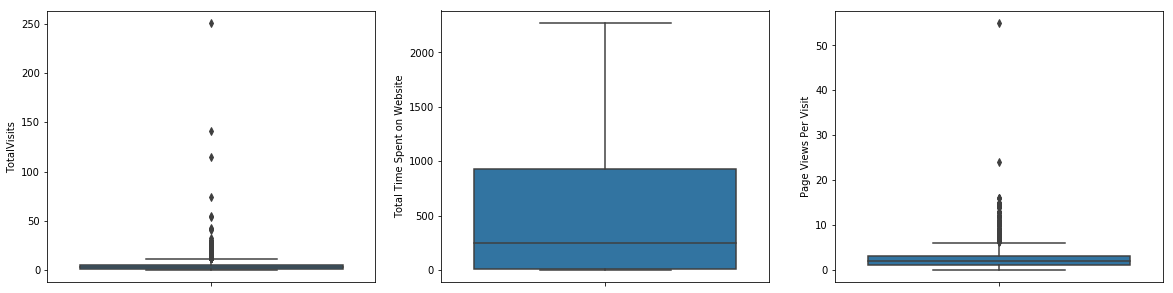

In [21]:
# Univariate analysis for numerical coclumns

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(leads_data['TotalVisits'], orient='v')
plt.subplot(1,3,2)
sns.boxplot(leads_data['Total Time Spent on Website'], orient='v')
plt.subplot(1,3,3)
sns.boxplot(leads_data['Page Views Per Visit'], orient='v')
plt.show()

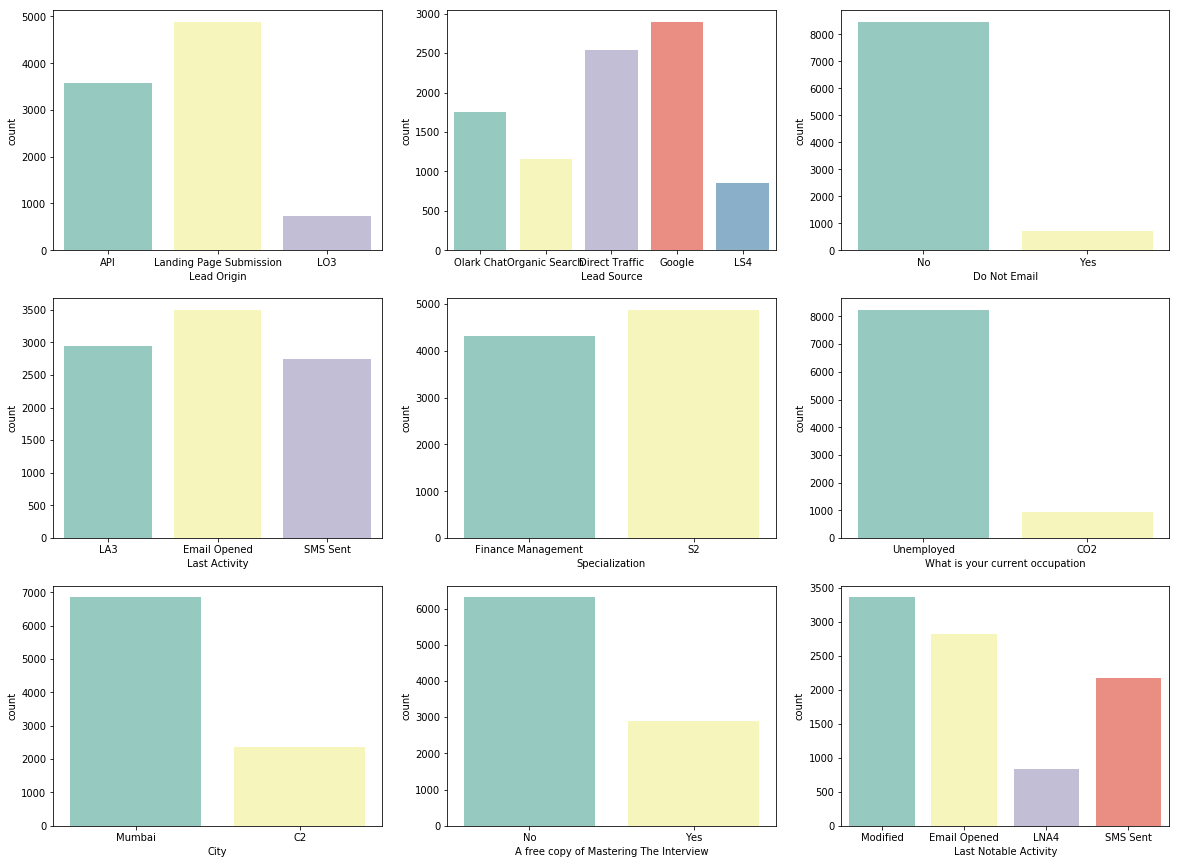

In [22]:
# Univariate analysis for categorical columns

plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.countplot(x='Lead Origin', data=leads_data, palette="Set3")
plt.subplot(3,3,2)
sns.countplot(x='Lead Source', data=leads_data, palette="Set3")
plt.subplot(3,3,3)
sns.countplot(x='Do Not Email', data=leads_data, palette="Set3")
plt.subplot(3,3,4)
sns.countplot(x='Last Activity', data=leads_data, palette="Set3")
plt.subplot(3,3,5)
sns.countplot(x='Specialization', data=leads_data, palette="Set3")
plt.subplot(3,3,6)
sns.countplot(x='What is your current occupation', data=leads_data, palette="Set3")
plt.subplot(3,3,7)
sns.countplot(x='City', data=leads_data, palette="Set3")
plt.subplot(3,3,8)
sns.countplot(x='A free copy of Mastering The Interview', data=leads_data, palette="Set3")
plt.subplot(3,3,9)
sns.countplot(x='Last Notable Activity', data=leads_data, palette="Set3")
plt.show()

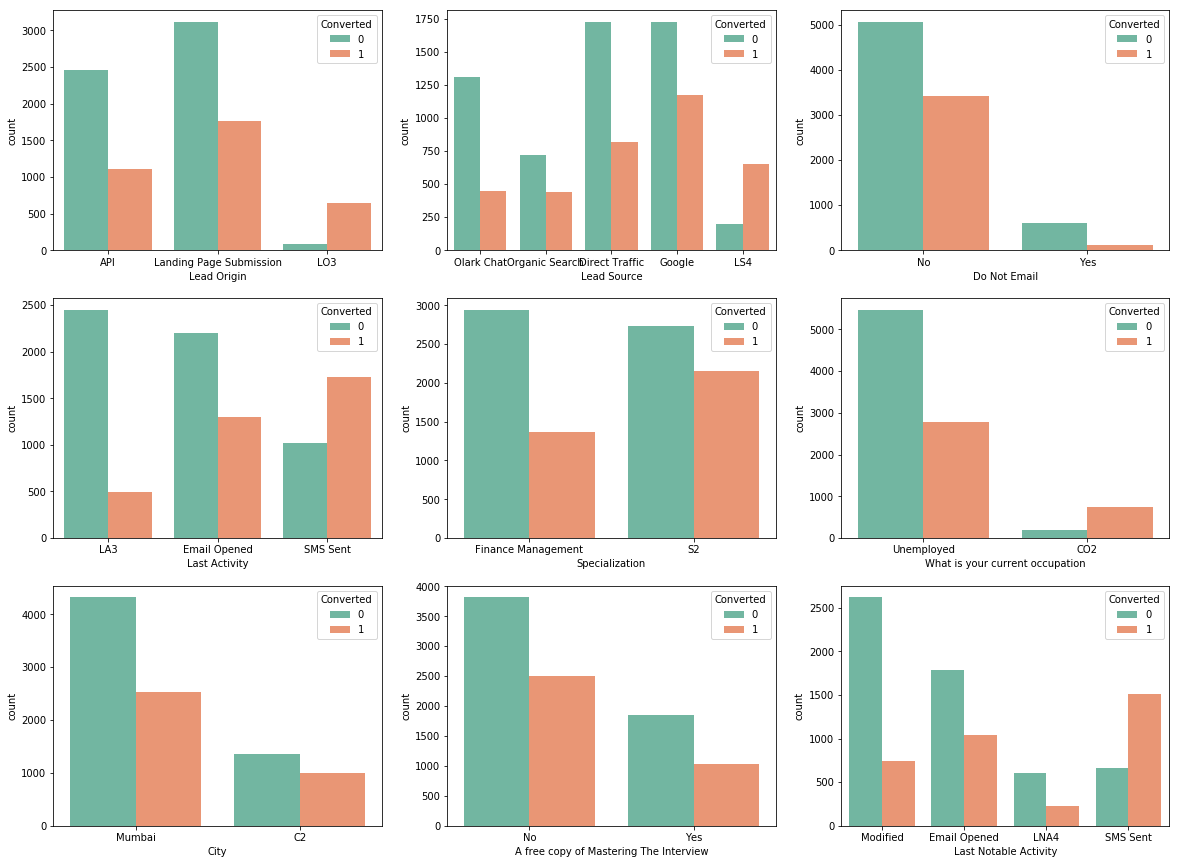

In [23]:
# Bivariate analysis for categorical columns

plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.countplot(x='Lead Origin',hue="Converted", data=leads_data, palette="Set2")
plt.subplot(3,3,2)
sns.countplot(x='Lead Source',hue="Converted", data=leads_data, palette="Set2")
plt.subplot(3,3,3)
sns.countplot(x='Do Not Email',hue="Converted", data=leads_data, palette="Set2")
plt.subplot(3,3,4)
sns.countplot(x='Last Activity',hue="Converted", data=leads_data, palette="Set2")
plt.subplot(3,3,5)
sns.countplot(x='Specialization',hue="Converted", data=leads_data, palette="Set2")
plt.subplot(3,3,6)
sns.countplot(x='What is your current occupation',hue="Converted", data=leads_data, palette="Set2")
plt.subplot(3,3,7)
sns.countplot(x='City',hue="Converted", data=leads_data, palette="Set2")
plt.subplot(3,3,8)
sns.countplot(x='A free copy of Mastering The Interview',hue="Converted", data=leads_data, palette="Set2")
plt.subplot(3,3,9)
sns.countplot(x='Last Notable Activity',hue="Converted", data=leads_data, palette="Set2")
plt.show()

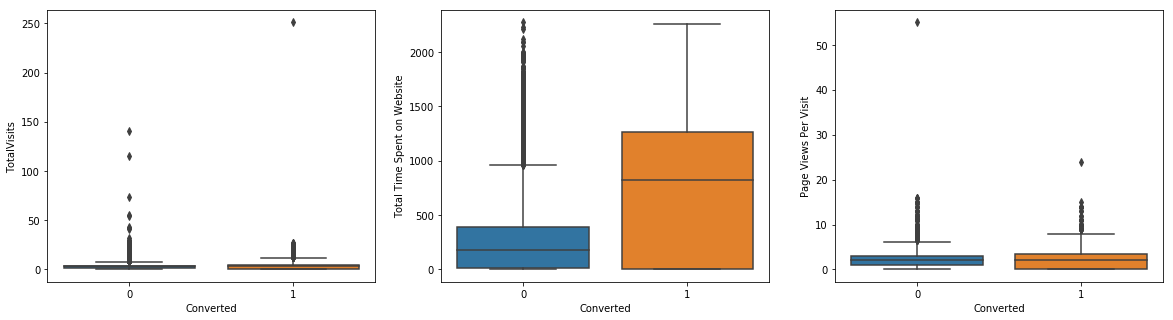

In [24]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x='Converted', y='TotalVisits', data=leads_data)
plt.subplot(1,3,2)
sns.boxplot(x='Converted', y='Total Time Spent on Website', data=leads_data)
plt.subplot(1,3,3)
sns.boxplot(x='Converted', y='Page Views Per Visit', data=leads_data)
plt.show()

# Converting binary variables (Yes/No) to 0/1

In [25]:
# List of varaiables to map

varlist = ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Applying the function to the housing list
leads_data[varlist] = leads_data[varlist].apply(binary_map)

leads_data[varlist].head()

,Do Not Email,A free copy of Mastering The Interview
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0


In [26]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,LA3,Finance Management,Unemployed,Mumbai,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Mumbai,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,S2,CO2,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,LA3,S2,Unemployed,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,LA3,Finance Management,Unemployed,Mumbai,0,Modified


# Creating dummies

In [27]:
# Creating dummy variables for the variable 'Lead Origin'
lo = pd.get_dummies(leads_data['Lead Origin'], prefix='Lead Origin')

# Dropping combined column
lo = lo.drop(['Lead Origin_LO3'], 1)

#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,lo], axis=1)

In [28]:
# Creating dummy variables for the variable 'Lead Origin'
ls = pd.get_dummies(leads_data['Lead Source'], prefix='Lead Source')

# Dropping combined column
ls = ls.drop(['Lead Source_LS4'], 1)

#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,ls], axis=1)

In [29]:
# Creating dummy variables for the variable 'Last Activity'
la = pd.get_dummies(leads_data['Last Activity'], prefix='Last Activity')

# Dropping combined column
la = la.drop(['Last Activity_LA3'], 1)

#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,la], axis=1)

In [30]:
# Creating dummy variables for the variable 'Last Activity'
sp = pd.get_dummies(leads_data['Specialization'], prefix='Specialization')

# Dropping combined column
sp = sp.drop(['Specialization_S2'], 1)

#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,sp], axis=1)

In [31]:
# Creating dummy variables for the variable 'Last Activity'
co = pd.get_dummies(leads_data['What is your current occupation'], prefix='What is your current occupation')

# Dropping combined column
co = co.drop(['What is your current occupation_CO2'], 1)

#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,co], axis=1)

In [32]:
# Creating dummy variables for the variable 'Last Activity'
ci = pd.get_dummies(leads_data['City'], prefix='City')

# Dropping combined column
ci = ci.drop(['City_C2'], 1)

#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,ci], axis=1)

In [33]:
# Creating dummy variables for the variable 'Last Activity'
lna = pd.get_dummies(leads_data['Last Notable Activity'], prefix='Last Notable Activity')

# Dropping combined column
lna = lna.drop(['Last Notable Activity_LNA4'], 1)

#Adding the results to the master dataframe
leads_data = pd.concat([leads_data,lna], axis=1)

In [34]:
# dropping redundant columns after creating dummies

leads_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation',
                'City', 'Last Notable Activity'], axis=1, inplace=True)

In [35]:
leads_data.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,...,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Email Opened,Last Activity_SMS Sent,Specialization_Finance Management,What is your current occupation_Unemployed,City_Mumbai,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,1,0,...,1,0,0,0,1,1,1,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,1,0,...,0,1,1,0,1,1,1,1,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,0,1,...,0,0,1,0,0,0,1,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,0,0,1,...,0,0,0,0,0,1,1,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,0,0,1,...,0,0,0,0,1,1,1,0,1,0


# Outliers

In [36]:
# checking the outliers

leads_data[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']].describe()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9197.000000,9197.000000,9197.000000
mean,3.410025,484.856366,2.338670
std,4.842392,546.535783,2.163436
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,247.000000,2.000000
75%,5.000000,930.000000,3.000000
max,251.000000,2272.000000,55.000000


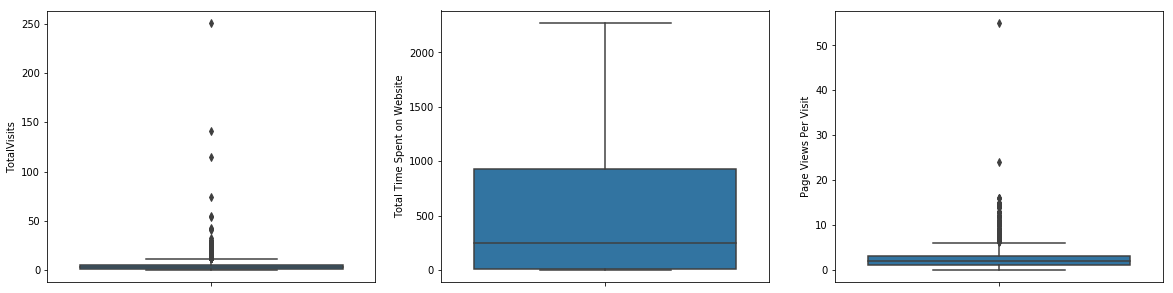

In [37]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(leads_data['TotalVisits'], orient='v')
plt.subplot(1,3,2)
sns.boxplot(leads_data['Total Time Spent on Website'], orient='v')
plt.subplot(1,3,3)
sns.boxplot(leads_data['Page Views Per Visit'], orient='v')

#### From the above boxplot, we can see that majority of the outliers are continuous and only few are actual outliers. So I decided a threshold individually for each column so that the extreme outliers are removed.


####   

In [38]:
leads_data['TotalVisits'] = leads_data['TotalVisits'].astype('int')
leads_data['TotalVisits'].quantile([0.25,0.50,0.75,0.90,0.95,0.99])
Q = leads_data['TotalVisits'].quantile(0.99)
Q

17.0

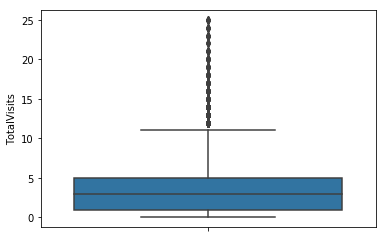

In [39]:
leads_data = leads_data[~(leads_data['TotalVisits']>1.5*Q)]
sns.boxplot(leads_data['TotalVisits'], orient='v')

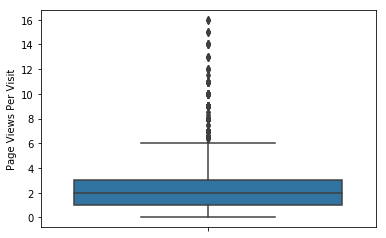

In [40]:
leads_data['Page Views Per Visit'].quantile([0.25,0.50,0.75,0.90,0.95,0.9999])
leads_data = leads_data[leads_data['Page Views Per Visit']<24]
sns.boxplot(leads_data['Page Views Per Visit'], orient='v')

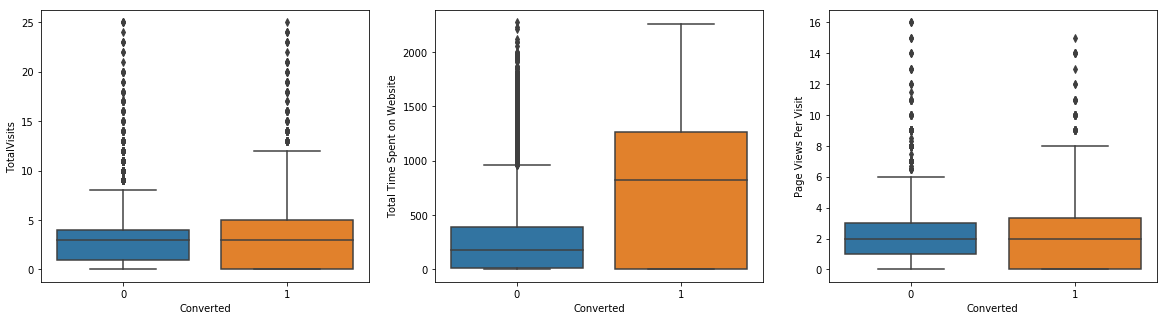

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x='Converted', y='TotalVisits', data=leads_data)
plt.subplot(1,3,2)
sns.boxplot(x='Converted', y='Total Time Spent on Website', data=leads_data)
plt.subplot(1,3,3)
sns.boxplot(x='Converted', y='Page Views Per Visit', data=leads_data)
plt.show()

# Train-Test Split

In [42]:
leads_data.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,...,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Email Opened,Last Activity_SMS Sent,Specialization_Finance Management,What is your current occupation_Unemployed,City_Mumbai,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0,0.0,0,1,0,...,1,0,0,0,1,1,1,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5,674,2.5,0,1,0,...,0,1,1,0,1,1,1,1,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2,1532,2.0,1,0,1,...,0,0,1,0,0,0,1,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1,305,1.0,0,0,1,...,0,0,0,0,0,1,1,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2,1428,1.0,0,0,1,...,0,0,0,0,1,1,1,0,1,0


In [43]:
X = leads_data.drop(['Prospect ID', 'Lead Number', 'Converted'],axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Email Opened,Last Activity_SMS Sent,Specialization_Finance Management,What is your current occupation_Unemployed,City_Mumbai,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,0,0,0,0.0,0,1,0,0,0,1,0,0,0,1,1,1,0,1,0
1,0,5,674,2.5,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0
2,0,2,1532,2.0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0
3,0,1,305,1.0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0
4,0,2,1428,1.0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0


In [44]:
# Target variable

y = leads_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [45]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [46]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Email Opened,Last Activity_SMS Sent,Specialization_Finance Management,What is your current occupation_Unemployed,City_Mumbai,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
1770,0,0.213115,1.860206,0.815464,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
4931,0,0.817136,-0.410160,1.784958,1,0,1,0,1,0,0,0,1,1,1,1,0,0,1
6357,0,-0.994928,-0.888324,-1.123525,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0
504,0,0.213115,2.104763,0.815464,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0
6892,0,-0.088896,1.172161,0.330717,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1


In [47]:
leads_percentage = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
leads_percentage

38.33660344451712

# Model Building

In [48]:
# Initial model building with all the columns

model1 = sm.GLM(y_train, (sm.add_constant(X_train)), family= sm.families.Binomial())
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6421
Model:                            GLM   Df Residuals:                     6401
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2751.5
Date:                Mon, 01 Jun 2020   Deviance:                       5502.9
Time:                        15:13:19   Pearson chi2:                 6.48e+03
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          4.0344      0.237     17.046      0.000       3.570       4.498
Do Not Email                                  -0.9313      0.156     -5.980      0.000      -1.237      -0.626
TotalVisits                                    0.2290      0.048      4.743      0.000       0.134       0.324
Total Time Spent on Website                    1.1114      0.040     27.751      0.000       1.033       1.190
Page Views Per Visit                          -0.1951      0.054     -3.607      0.000      -0.301      -0.089
A free copy of Mastering The Interview        -0.0277      0.106     -0.262      0.793      -0.235       0.180
Lead Origin_API                               -3.3894      0.312    -10.871      0.000      -4.001      -2.778
Lead Origin_Landing Page Submission           -3.8255      0.323    -11.832      0.000      -4.459      -3.192
Lead Source_Direct Traffic                    -0.0690      0.289     -0.239      0.811      -0.636       0.498
Lead Source_Google                             0.3174      0.277      1.146      0.252      -0.225       0.860
Lead Source_Olark Chat                         1.1603      0.295      3.936      0.000       0.582       1.738
Lead Source_Organic Search                     0.1321      0.289      0.457      0.648      -0.435       0.699
Last Activity_Email Opened                     0.8965      0.152      5.900      0.000       0.599       1.194
Last Activity_SMS Sent                         1.2902      0.156      8.273      0.000       0.985       1.596
Specialization_Finance Management             -0.5289      0.090     -5.845      0.000      -0.706      -0.352
What is your current occupation_Unemployed    -1.8735      0.127    -14.723      0.000      -2.123      -1.624
City_Mumbai                                   -0.0821      0.084     -0.983      0.326      -0.246       0.082
Last Notable Activity_Email Opened            -0.5086      0.198     -2.565      0.010      -0.897      -0.120
Last Notable Activity_Modified                -0.7171      0.146     -4.913      0.000      -1.003      -0.431
Last Notable Activity_SMS Sent                 0.5907      0.204      2.891      0.004       0.190       0.991
==============================================================================================================
"""

## Using the RFE approach to reduce the number of columns to 15

In [49]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [50]:
rfe.support_

array([ True,  True,  True,  True, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True])

In [51]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 5),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('City_Mumbai', False, 3),
 ('Last Notable Activity_Email Opened', True, 1),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_SMS Sent', True, 1)]

In [52]:
col = X_train.columns[rfe.support_]

In [53]:
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview', 'Lead Source_Google',
       'Lead Source_Organic Search', 'City_Mumbai'],
      dtype='object')

In [54]:
# Building a new model without RFE eliminated columns

X_train_sm = sm.add_constant(X_train[col])
model2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6421
Model:                            GLM   Df Residuals:                     6405
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2753.8
Date:                Mon, 01 Jun 2020   Deviance:                       5507.7
Time:                        15:13:20   Pearson chi2:                 6.47e+03
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          3.9731      0.229     17.374      0.000       3.525       4.421
Do Not Email                                  -0.9334      0.155     -6.021      0.000      -1.237      -0.630
TotalVisits                                    0.2186      0.048      4.583      0.000       0.125       0.312
Total Time Spent on Website                    1.1150      0.040     27.880      0.000       1.037       1.193
Page Views Per Visit                          -0.2065      0.054     -3.850      0.000      -0.312      -0.101
Lead Origin_API                               -3.1326      0.180    -17.395      0.000      -3.486      -2.780
Lead Origin_Landing Page Submission           -3.5437      0.187    -18.932      0.000      -3.911      -3.177
Lead Source_Direct Traffic                    -0.3460      0.091     -3.822      0.000      -0.523      -0.169
Lead Source_Olark Chat                         0.8859      0.131      6.749      0.000       0.629       1.143
Last Activity_Email Opened                     0.9068      0.152      5.974      0.000       0.609       1.204
Last Activity_SMS Sent                         1.3008      0.156      8.349      0.000       0.995       1.606
Specialization_Finance Management             -0.5441      0.088     -6.167      0.000      -0.717      -0.371
What is your current occupation_Unemployed    -1.8742      0.127    -14.723      0.000      -2.124      -1.625
Last Notable Activity_Email Opened            -0.5185      0.198     -2.618      0.009      -0.907      -0.130
Last Notable Activity_Modified                -0.7265      0.146     -4.983      0.000      -1.012      -0.441
Last Notable Activity_SMS Sent                 0.5768      0.204      2.827      0.005       0.177       0.977
==============================================================================================================
"""

In [55]:
# Checking VIFs

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Email Opened,9.21
11,What is your current occupation_Unemployed,9.10
5,Lead Origin_Landing Page Submission,9.07
14,Last Notable Activity_SMS Sent,7.78
8,Last Activity_Email Opened,6.95
4,Lead Origin_API,6.94
9,Last Activity_SMS Sent,6.28
13,Last Notable Activity_Modified,4.67
10,Specialization_Finance Management,3.07
7,Lead Source_Olark Chat,2.70


In [56]:
# Dropping 'Last Notable Activity_Email Opened' based on VIF value

col = col.drop('Last Notable Activity_Email Opened',1)
X_train_sm = sm.add_constant(X_train[col])
model3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = model3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6421
Model:                            GLM   Df Residuals:                     6406
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2757.2
Date:                Mon, 01 Jun 2020   Deviance:                       5514.4
Time:                        15:13:20   Pearson chi2:                 6.45e+03
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          3.8208      0.222     17.221      0.000       3.386       4.256
Do Not Email                                  -0.9126      0.155     -5.899      0.000      -1.216      -0.609
TotalVisits                                    0.2338      0.047      4.927      0.000       0.141       0.327
Total Time Spent on Website                    1.1166      0.040     27.943      0.000       1.038       1.195
Page Views Per Visit                          -0.2130      0.054     -3.974      0.000      -0.318      -0.108
Lead Origin_API                               -3.1692      0.180    -17.626      0.000      -3.522      -2.817
Lead Origin_Landing Page Submission           -3.5808      0.187    -19.168      0.000      -3.947      -3.215
Lead Source_Direct Traffic                    -0.3448      0.090     -3.812      0.000      -0.522      -0.168
Lead Source_Olark Chat                         0.8993      0.131      6.865      0.000       0.643       1.156
Last Activity_Email Opened                     0.6104      0.102      5.978      0.000       0.410       0.811
Last Activity_SMS Sent                         1.2029      0.150      8.002      0.000       0.908       1.498
Specialization_Finance Management             -0.5403      0.088     -6.130      0.000      -0.713      -0.368
What is your current occupation_Unemployed    -1.8723      0.127    -14.745      0.000      -2.121      -1.623
Last Notable Activity_Modified                -0.4497      0.101     -4.439      0.000      -0.648      -0.251
Last Notable Activity_SMS Sent                 0.8555      0.175      4.894      0.000       0.513       1.198
==============================================================================================================
"""

In [57]:
# Checking VIFs

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,8.98
5,Lead Origin_Landing Page Submission,8.13
13,Last Notable Activity_SMS Sent,6.51
4,Lead Origin_API,6.38
9,Last Activity_SMS Sent,6.03
10,Specialization_Finance Management,3.06
7,Lead Source_Olark Chat,2.68
12,Last Notable Activity_Modified,2.63
8,Last Activity_Email Opened,2.47
3,Page Views Per Visit,2.39


In [58]:
# Dropping 'What is your current occupation_Unemployed' based on VIF value

col = col.drop('What is your current occupation_Unemployed',1)
X_train_sm = sm.add_constant(X_train[col])
model4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = model4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6421
Model:                            GLM   Df Residuals:                     6407
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2881.0
Date:                Mon, 01 Jun 2020   Deviance:                       5762.0
Time:                        15:13:20   Pearson chi2:                 6.58e+03
No. Iterations:                     5   Covariance Type:             nonrobust
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   2.3958      0.187     12.814      0.000       2.029       2.762
Do Not Email                           -0.9898      0.153     -6.460      0.000      -1.290      -0.689
TotalVisits                             0.2097      0.046      4.545      0.000       0.119       0.300
Total Time Spent on Website             1.1274      0.039     28.771      0.000       1.051       1.204
Page Views Per Visit                   -0.1946      0.052     -3.721      0.000      -0.297      -0.092
Lead Origin_API                        -3.3126      0.176    -18.830      0.000      -3.657      -2.968
Lead Origin_Landing Page Submission    -3.7850      0.182    -20.757      0.000      -4.142      -3.428
Lead Source_Direct Traffic             -0.3279      0.088     -3.724      0.000      -0.500      -0.155
Lead Source_Olark Chat                  0.9177      0.128      7.169      0.000       0.667       1.169
Last Activity_Email Opened              0.5739      0.099      5.795      0.000       0.380       0.768
Last Activity_SMS Sent                  1.0799      0.147      7.342      0.000       0.792       1.368
Specialization_Finance Management      -0.6978      0.086     -8.147      0.000      -0.866      -0.530
Last Notable Activity_Modified         -0.4569      0.099     -4.633      0.000      -0.650      -0.264
Last Notable Activity_SMS Sent          0.9231      0.171      5.391      0.000       0.588       1.259
=======================================================================================================
"""

In [59]:
# Checking VIFs

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
12,Last Notable Activity_SMS Sent,6.49
9,Last Activity_SMS Sent,5.99
5,Lead Origin_Landing Page Submission,5.44
4,Lead Origin_API,5.00
10,Specialization_Finance Management,2.89
7,Lead Source_Olark Chat,2.66
11,Last Notable Activity_Modified,2.54
3,Page Views Per Visit,2.36
8,Last Activity_Email Opened,2.32
1,TotalVisits,2.10


In [60]:
# Dropping 'Last Notable Activity_SMS Sent' based on VIF value

col = col.drop('Last Notable Activity_SMS Sent',1)
X_train_sm = sm.add_constant(X_train[col])
model5 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = model5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6421
Model:                            GLM   Df Residuals:                     6408
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2895.7
Date:                Mon, 01 Jun 2020   Deviance:                       5791.5
Time:                        15:13:21   Pearson chi2:                 6.57e+03
No. Iterations:                     5   Covariance Type:             nonrobust
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   2.5857      0.184     14.061      0.000       2.225       2.946
Do Not Email                           -1.0089      0.153     -6.613      0.000      -1.308      -0.710
TotalVisits                             0.1854      0.046      4.059      0.000       0.096       0.275
Total Time Spent on Website             1.1280      0.039     28.872      0.000       1.051       1.205
Page Views Per Visit                   -0.1824      0.052     -3.504      0.000      -0.284      -0.080
Lead Origin_API                        -3.2996      0.176    -18.786      0.000      -3.644      -2.955
Lead Origin_Landing Page Submission    -3.7750      0.182    -20.736      0.000      -4.132      -3.418
Lead Source_Direct Traffic             -0.3291      0.088     -3.754      0.000      -0.501      -0.157
Lead Source_Olark Chat                  0.9096      0.128      7.122      0.000       0.659       1.160
Last Activity_Email Opened              0.4252      0.095      4.477      0.000       0.239       0.611
Last Activity_SMS Sent                  1.6719      0.097     17.295      0.000       1.482       1.861
Specialization_Finance Management      -0.6911      0.085     -8.097      0.000      -0.858      -0.524
Last Notable Activity_Modified         -0.7694      0.081     -9.536      0.000      -0.928      -0.611
=======================================================================================================
"""

In [61]:
# Checking VIFs

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
5,Lead Origin_Landing Page Submission,5.09
4,Lead Origin_API,4.79
10,Specialization_Finance Management,2.88
7,Lead Source_Olark Chat,2.66
3,Page Views Per Visit,2.36
8,Last Activity_Email Opened,2.24
1,TotalVisits,2.08
6,Lead Source_Direct Traffic,2.00
11,Last Notable Activity_Modified,1.91
9,Last Activity_SMS Sent,1.90


In [62]:
# Dropping 'Lead Origin_Landing Page Submission' based on VIF value

col = col.drop('Lead Origin_Landing Page Submission',1)
X_train_sm = sm.add_constant(X_train[col])
model6 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = model6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6421
Model:                            GLM   Df Residuals:                     6409
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3170.0
Date:                Mon, 01 Jun 2020   Deviance:                       6339.9
Time:                        15:13:21   Pearson chi2:                 7.14e+03
No. Iterations:                     5   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.3727      0.098     -3.813      0.000      -0.564      -0.181
Do Not Email                         -0.9381      0.141     -6.658      0.000      -1.214      -0.662
TotalVisits                           0.0568      0.045      1.272      0.203      -0.031       0.144
Total Time Spent on Website           0.9730      0.037     26.412      0.000       0.901       1.045
Page Views Per Visit                 -0.6764      0.050    -13.454      0.000      -0.775      -0.578
Lead Origin_API                      -0.4974      0.095     -5.215      0.000      -0.684      -0.310
Lead Source_Direct Traffic           -1.0670      0.080    -13.333      0.000      -1.224      -0.910
Lead Source_Olark Chat               -0.0377      0.115     -0.329      0.742      -0.262       0.187
Last Activity_Email Opened            0.5611      0.090      6.256      0.000       0.385       0.737
Last Activity_SMS Sent                1.7909      0.092     19.542      0.000       1.611       1.971
Specialization_Finance Management    -0.3933      0.078     -5.064      0.000      -0.545      -0.241
Last Notable Activity_Modified       -0.7259      0.076     -9.595      0.000      -0.874      -0.578
=====================================================================================================
"""

In [63]:
# Checking VIFs

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
4,Lead Origin_API,3.51
9,Specialization_Finance Management,2.84
6,Lead Source_Olark Chat,2.45
3,Page Views Per Visit,2.21
1,TotalVisits,2.01
7,Last Activity_Email Opened,1.49
10,Last Notable Activity_Modified,1.49
5,Lead Source_Direct Traffic,1.48
8,Last Activity_SMS Sent,1.34
2,Total Time Spent on Website,1.24


In [64]:
# Dropping 'Lead Source_Olark Chat' based on p-value

col = col.drop('Lead Source_Olark Chat',1)
X_train_sm = sm.add_constant(X_train[col])
model7 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = model7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6421
Model:                            GLM   Df Residuals:                     6410
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3170.0
Date:                Mon, 01 Jun 2020   Deviance:                       6340.0
Time:                        15:13:21   Pearson chi2:                 7.14e+03
No. Iterations:                     5   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.3762      0.097     -3.872      0.000      -0.567      -0.186
Do Not Email                         -0.9373      0.141     -6.654      0.000      -1.213      -0.661
TotalVisits                           0.0582      0.044      1.312      0.190      -0.029       0.145
Total Time Spent on Website           0.9758      0.036     27.216      0.000       0.906       1.046
Page Views Per Visit                 -0.6734      0.049    -13.621      0.000      -0.770      -0.577
Lead Origin_API                      -0.5128      0.083     -6.160      0.000      -0.676      -0.350
Lead Source_Direct Traffic           -1.0672      0.080    -13.329      0.000      -1.224      -0.910
Last Activity_Email Opened            0.5628      0.090      6.288      0.000       0.387       0.738
Last Activity_SMS Sent                1.7932      0.091     19.622      0.000       1.614       1.972
Specialization_Finance Management    -0.3923      0.078     -5.054      0.000      -0.544      -0.240
Last Notable Activity_Modified       -0.7244      0.076     -9.594      0.000      -0.872      -0.576
=====================================================================================================
"""

In [65]:
# Checking VIFs

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
8,Specialization_Finance Management,2.84
4,Lead Origin_API,2.70
3,Page Views Per Visit,2.11
1,TotalVisits,1.99
5,Lead Source_Direct Traffic,1.48
6,Last Activity_Email Opened,1.48
9,Last Notable Activity_Modified,1.48
7,Last Activity_SMS Sent,1.34
2,Total Time Spent on Website,1.18
0,Do Not Email,1.13


In [66]:
# Dropping 'TotalVisits' based on p-value

col = col.drop('TotalVisits',1)
X_train_sm = sm.add_constant(X_train[col])
model7 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = model7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6421
Model:                            GLM   Df Residuals:                     6411
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3170.9
Date:                Mon, 01 Jun 2020   Deviance:                       6341.7
Time:                        15:13:21   Pearson chi2:                 7.13e+03
No. Iterations:                     5   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.3555      0.096     -3.708      0.000      -0.543      -0.168
Do Not Email                         -0.9453      0.141     -6.711      0.000      -1.221      -0.669
Total Time Spent on Website           0.9809      0.036     27.500      0.000       0.911       1.051
Page Views Per Visit                 -0.6353      0.040    -15.957      0.000      -0.713      -0.557
Lead Origin_API                      -0.5117      0.083     -6.145      0.000      -0.675      -0.349
Lead Source_Direct Traffic           -1.0669      0.080    -13.321      0.000      -1.224      -0.910
Last Activity_Email Opened            0.5481      0.089      6.174      0.000       0.374       0.722
Last Activity_SMS Sent                1.7742      0.090     19.680      0.000       1.597       1.951
Specialization_Finance Management    -0.4002      0.077     -5.169      0.000      -0.552      -0.248
Last Notable Activity_Modified       -0.7385      0.075     -9.878      0.000      -0.885      -0.592
=====================================================================================================
"""

In [67]:
# Checking VIFs

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
7,Specialization_Finance Management,2.83
3,Lead Origin_API,2.69
5,Last Activity_Email Opened,1.48
8,Last Notable Activity_Modified,1.48
4,Lead Source_Direct Traffic,1.47
6,Last Activity_SMS Sent,1.34
2,Page Views Per Visit,1.25
1,Total Time Spent on Website,1.16
0,Do Not Email,1.13


#### At this point, all the variables have 0 p-value and low VIF values. So this model is finalized and can be evaluated for performance.


####   

# Model Evaluation

In [68]:
# getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.93849562, 0.37335232, 0.19389372, 0.61121648, 0.78437374,
       0.44446939, 0.25809263, 0.95958355, 0.46737002, 0.29383655])

In [69]:
# Making a dataframe with predicted probabilities

y_train_pred_final = pd.DataFrame({'Lead':y_train.values, 'lead_prob':y_train_pred, 'RowID':y_train.index})
y_train_pred_final.head()
                                   

,Lead,lead_prob,RowID
0,1,0.938496,1770
1,0,0.373352,4931
2,0,0.193894,6357
3,0,0.611216,504
4,1,0.784374,6892


In [70]:
X_train[col].head()

,Do Not Email,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Source_Direct Traffic,Last Activity_Email Opened,Last Activity_SMS Sent,Specialization_Finance Management,Last Notable Activity_Modified
1770,0,1.860206,0.815464,0,0,0,1,0,0
4931,0,-0.410160,1.784958,0,0,0,1,1,0
6357,0,-0.888324,-1.123525,1,0,0,0,1,0
504,0,2.104763,0.815464,0,0,0,0,0,1
6892,0,1.172161,0.330717,0,1,0,1,0,0


In [71]:
# Make prediction on lead values based on lead probabilities by randomly choosing a cut-off value of 0.5

y_train_pred_final['prediction'] = y_train_pred_final.lead_prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head(10)

,Lead,lead_prob,RowID,prediction
0,1,0.938496,1770,1
1,0,0.373352,4931,0
2,0,0.193894,6357,0
3,0,0.611216,504,1
4,1,0.784374,6892,1
5,0,0.444469,8318,0
6,0,0.258093,6941,0
7,1,0.959584,3095,1
8,0,0.467370,5256,0
9,0,0.293837,6168,0


In [72]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.prediction)
confusion

array([[3354,  590],
       [ 873, 1604]], dtype=int64)

In [73]:
# overall accuracy

metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.prediction)


0.7721538701136894

In [74]:
# Metrics beyond accuracy

TP = confusion[1,1]
TN = confusion[0,0]
FN = confusion[1,0]
FP = confusion[0,1]

In [75]:
# Sensitivity or recall, Precision

sensitivity = TP/(TP+FN)
precision = TP/(TP+FP)
print('The sensitivity is {}'.format(sensitivity))
print('The precision is {}'.format(precision))

The sensitivity is 0.6475575292692773
The precision is 0.731084776663628


In [76]:
# f1 score

precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*((precision*recall)/(precision+recall))
f1_score

0.6867908370798544

#### At this point, the sensitivity of the model is less because we randomly chose the probability cut off as 0.5. The sensitivity will be increased once we plot the ROC curve and find the optimal cut off point.


####  

## Plottting the ROC curve

In [77]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [78]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Lead, y_train_pred_final.lead_prob, drop_intermediate = False )

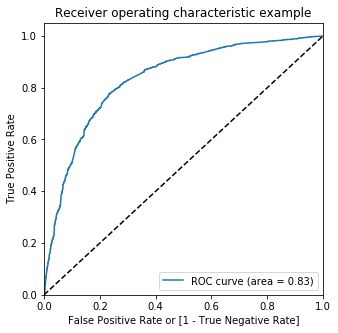

In [79]:
draw_roc(y_train_pred_final.Lead, y_train_pred_final.lead_prob)

## Finding Optimal cutoff point

In [80]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.lead_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead,lead_prob,RowID,prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.938496,1770,1,1,1,1,1,1,1,1,1,1,1
1,0,0.373352,4931,0,1,1,1,1,0,0,0,0,0,0
2,0,0.193894,6357,0,1,1,0,0,0,0,0,0,0,0
3,0,0.611216,504,1,1,1,1,1,1,1,1,0,0,0
4,1,0.784374,6892,1,1,1,1,1,1,1,1,1,0,0


In [81]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385765  1.000000  0.000000
0.1   0.1  0.499611  0.978603  0.198783
0.2   0.2  0.673727  0.914413  0.522566
0.3   0.3  0.749727  0.828421  0.700304
0.4   0.4  0.771064  0.752927  0.782454
0.5   0.5  0.772154  0.647558  0.850406
0.6   0.6  0.749727  0.504239  0.903905
0.7   0.7  0.725588  0.387566  0.937880
0.8   0.8  0.678555  0.217198  0.968306
0.9   0.9  0.642735  0.089221  0.990365


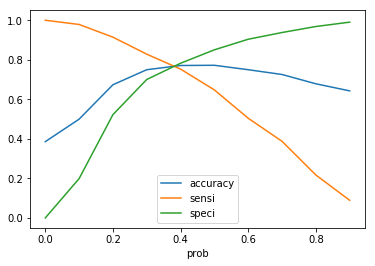

In [82]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### As the sensitivity of the model is the important metric, i have taken the cut off as 0.3

In [83]:
y_train_pred_final['final_predicted'] = y_train_pred_final.lead_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final['lead_score'] = y_train_pred_final['lead_prob']*100
y_train_pred_final.head()

,Lead,lead_prob,RowID,prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,1,0.938496,1770,1,1,1,1,1,1,1,1,1,1,1,1,93.849562
1,0,0.373352,4931,0,1,1,1,1,0,0,0,0,0,0,1,37.335232
2,0,0.193894,6357,0,1,1,0,0,0,0,0,0,0,0,0,19.389372
3,0,0.611216,504,1,1,1,1,1,1,1,1,0,0,0,1,61.121648
4,1,0.784374,6892,1,1,1,1,1,1,1,1,1,0,0,1,78.437374


In [84]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.final_predicted)

0.7497274567824327

In [85]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.final_predicted )
confusion2

array([[2762, 1182],
       [ 425, 2052]], dtype=int64)

In [86]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [87]:
# Sensitivity/Recall, Precision

sensitivity = TP/(TP+FN)
precision = TP/(TP+FP)
print('The sensitivity is {}'.format(sensitivity))
print('The precision is {}'.format(precision))

The sensitivity is 0.8284214775938635
The precision is 0.634508348794063


In [90]:
# f1 score

precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*((precision*recall)/(precision+recall))
f1_score

0.7186132025914901

# Predicitions on Test set

In [91]:
X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']])
X_test = X_test[col]
X_test.head()


,Do Not Email,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Source_Direct Traffic,Last Activity_Email Opened,Last Activity_SMS Sent,Specialization_Finance Management,Last Notable Activity_Modified
5903,0,0.055229,-0.154030,0,1,0,0,0,0
8928,0,1.768953,0.170750,1,1,0,1,0,0
7648,0,-0.397385,-0.236437,0,1,1,0,0,0
495,0,-0.864598,-0.154030,0,1,1,0,0,0
5684,0,-0.888324,-1.123525,1,0,0,0,1,1


In [92]:
y_test.shape

(2753,)

In [93]:
X_test_sm = sm.add_constant(X_test)

In [94]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

5903    0.219187
8928    0.812547
7648    0.247139
495     0.164577
5684    0.103089
5496    0.199686
8283    0.103089
2479    0.291520
296     0.124304
6392    0.339902
dtype: float64

In [95]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.shape

(2753, 1)

In [96]:
y_test_df = pd.DataFrame(y_test)
y_test_df['RowID'] = y_test_df.index

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

y_test_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_test_pred_final.head()

,Converted,RowID,0
0,0,5903,0.219187
1,1,8928,0.812547
2,0,7648,0.247139
3,0,495,0.164577
4,0,5684,0.103089


In [97]:
y_test_pred_final['Converted'] = y_test_pred_final['Converted'].astype(int)

In [98]:
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Lead_Prob'})

# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex_axis(['RowID','Converted','Lead_Prob'], axis=1)
y_test_pred_final.head()

,RowID,Converted,Lead_Prob
0,5903,0,0.219187
1,8928,1,0.812547
2,7648,0,0.247139
3,495,0,0.164577
4,5684,0,0.103089


In [99]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_test_pred_final['lead_score'] = y_test_pred_final['Lead_Prob']*100
y_test_pred_final.head()

,RowID,Converted,Lead_Prob,final_predicted,lead_score
0,5903,0,0.219187,0,21.918656
1,8928,1,0.812547,1,81.254679
2,7648,0,0.247139,0,24.713933
3,495,0,0.164577,0,16.457739
4,5684,0,0.103089,0,10.308932


In [100]:
# Confusion matrix

confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted )
confusion2

array([[1197,  516],
       [ 171,  869]], dtype=int64)

In [101]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [102]:
# Sensitivity or recall, Precision

sensitivity = TP/(TP+FN)
precision = TP/(TP+FP)
print('The sensitivity is {}'.format(sensitivity))
print('The precision is {}'.format(precision))

The sensitivity is 0.8355769230769231
The precision is 0.6274368231046932


In [103]:
# f1 score

precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*((precision*recall)/(precision+recall))
f1_score

0.7167010309278351

In [104]:
# lead scores of the train set leads

y_train_pred_final.head()
y_train_pred_final[['RowID', 'lead_score']].head()

,RowID,lead_score
0,1770,93.849562
1,4931,37.335232
2,6357,19.389372
3,504,61.121648
4,6892,78.437374


In [105]:
# lead scores of the test set leads

y_test_pred_final.head()
y_test_pred_final[['RowID', 'lead_score']].head()

,RowID,lead_score
0,5903,21.918656
1,8928,81.254679
2,7648,24.713933
3,495,16.457739
4,5684,10.308932


In [106]:
# lead scores of all the leads (entire dataset)

final_scores = pd.concat([y_train_pred_final[['RowID', 'lead_score']], y_test_pred_final[['RowID', 'lead_score']]], axis=0)
final_scores.head()

,RowID,lead_score
0,1770,93.849562
1,4931,37.335232
2,6357,19.389372
3,504,61.121648
4,6892,78.437374


In [107]:
# Sorting the final scores dataframe based on Row ID so that it can be concatenated with the entire datas

final_scores = final_scores.sort_values(by='RowID', ascending=True)
final_scores.reset_index(drop=True, inplace=True)
final_scores.head()

,RowID,lead_score
0,0,10.308932
1,1,39.169211
2,2,74.925685
3,3,11.101613
4,4,64.489489


In [108]:
# Adding lead scores to the entire dataset

leads_data.insert(loc=2, column='lead_score', value=final_scores['lead_score'])
leads_data.head()

,Prospect ID,Lead Number,lead_score,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,...,Lead Source_Olark Chat,Lead Source_Organic Search,Last Activity_Email Opened,Last Activity_SMS Sent,Specialization_Finance Management,What is your current occupation_Unemployed,City_Mumbai,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,10.308932,0,0,0,0,0.0,0,1,...,1,0,0,0,1,1,1,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,39.169211,0,0,5,674,2.5,0,1,...,0,1,1,0,1,1,1,1,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,74.925685,0,1,2,1532,2.0,1,0,...,0,0,1,0,0,0,1,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,11.101613,0,0,1,305,1.0,0,0,...,0,0,0,0,0,1,1,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,64.489489,0,1,2,1428,1.0,0,0,...,0,0,0,0,1,1,1,0,1,0
